# SUSA CX Kaggle Capstone Project
## Part 2: Feature Engineering, Shrinkage, and PCA in Linear Models

### Table Of Contents
* [Introduction](#section1)
* [Extensions to Linear Modeling](#section2)   
    1. [Feature Engineering & Polynomial Regression](#i)
    2. [Shrinkage & Lasso Regression](#ii)
    3. [Principal Component Analysis](#iii)
* [Conclusion](#conclusion)
* [Additional Reading](#reading)


### Hosted by and maintained by the [Statistics Undergraduate Students Association (SUSA)](https://susa.berkeley.edu). Originally authored by [Arun Ramamurthy](mailto:contact@arun.run), [Patrick Chao](mailto:prc@berkeley.edu), & [Noah Gundotra](mailto:noah.gundotra@berkeley.edu).


<a id='section1'></a>
# SUSA CX Kaggle Capstone Project

Welcome to the second week of the SUSA CX Kaggle Capstone! Now that you have an understanding of your data, a cleaned dataset, and a working model, now it's time to improve your model performance with some new tricks and techniques.  This week, you and your teammates will choose one of three techniques to improve your model further, read an article on the topic, and read through documentation to write the model for yourselves! The overarching goal of this week is to give you practice reading about and coding basic, but powerful, models - just like you'd do in real life when learning a new model design. 

## How will you outperform your first model?

One way to improve your model performance is to use a better model. These days, deep learning models are popular because they are performant and do not suffer from model bias. However, these models also lack interpretability, clear diagnostic procedures, and replicability. In Week 4 we will help you design and train a neural net to predict `SalesPrice`, but in the meantime, we are going to be sticking with (generalized) linear models.

This week, you will choose one of the following three topics to learn with your team. The topics are as follows:   
1. **Feature Engineering**: In this module, you will learn guidelines for pre-processing your features (e.g. squaring them, or taking the log, etc.). This segues into Polynomial Regression, a form of linear regression where you apply several different powers to your features before entering them into a model.

2. **Shrinkage**: In this module, you will learn a technique that specifically targets overfitting and feature selection. Instead of selecting relevant features manually, shrinkage will automatically get rid of unimportant features and avoid sinuous linear models. This segues into Lasso Regression, a form of regression that penalizes the use of too many features.

2. **Principal Component Analysis**: In this module, you will learn a technique that performs both feature engineering and shrinkage at the same time by re-constructing a new basis (yes, that same word you learnt about in Math 54!) for your features. Once cast into this new basis, your dataset retains all of its information, but your new features are orthogonal and sorted in order of importance. You can then just choose the first few of these features, and your linear model should increase in predictive accuracy.

# Logistics

Most of the logistics are the same as last week, but we are repeating them here for your convenience. Please let us know if you or your teammates are feeling nervous about the pace of this project - remember that we are not grading you on your project, and we really try to make the notebooks relatively easy and fast to code through. If for any reason you are feeling overwhelmed or frustrated, please DM us or talk to us in person. We want all of you to have a productive, healthy, and fun time learning data science!

### SUSA Datathon

The SUSA Datathon is this weekend, and it's the perfect time to finish the contents of this workbook! The datathon is on **Sunday from 5-9PM, in GPB 100**, and **dinner will be provided**. This event is **mandatory** for all CX members, but many other committees and mentors in SUSA will be there too. At the Datathon, members from many SUSA committees, notably Data Consulting, Research & Publication, and Career Exploration, will all meet up and work on their respective projects together. There will be many other SUSA mentors there to help you and it should be a great environment for you and your group to work in. This is also another great opportunity to meet other experienced SUSA members and get a taste for other committees in the club. See you all there!

### Mandatory Office Hours

Because this is such a large project, you and your team will surely have to work on it outside of meetings. In order to get you guys to seek help from this project, we are making it **mandatory** for you and your group to attend **two (2)** SUSA Office Hours over the next 4 weeks. This will allow questions to be answered outside of the regular meetings and will help promote collaboration with more experienced SUSA members.

The schedule of SUSA office hours are below:
https://susa.berkeley.edu/calendar#officehours-table

We understand that most of you will end up going to Arun or Patrick's office hours, but we highly encourage you to go to other people's office hours as well. There are many qualified SUSA mentors who can help and this could be an opportunity for you to meet them.

### Git

Given that this is a collaborative project, you'll need to work with your team members on the same codebase simutaneously! This is fortunately simple with Git, which you learned in your very first workshop. Visit `py0` if you need a refresher, but we will be going over the steps for collaborative work here too.

1. First, decide on which one of you will be hosting the forked Github repository for `crash-course`. Ideally, this would be someone with some GitHub experience and a GitHub account. If no one on your team has a GitHub account, one of you should sign up for one. For our examples, we will call this person's account name `rprincess`.

2. Next, have the above person navigate to the [SUSA crash-course repository](https://github.com/SUSA-org/crash-course) and click the `Fork` button. GitHub will make a copy of the crash-course repository in your team member's account. 

3. Each one of you can download the `rprincess` repository to your local computer with the following command: `git clone https://github.com/rprincess/crash-course.git`.

4. The `rprincess` must add their team members' account information to the fork (to allow them to push to your repo). You can find this option by going to the Settings page of your forked repository of crash-course, then clicking "Collaborators & Teams" (e.g. `https://github.com/rprincess/git-demo/settings/collaboration`).

4. Feel free to work within the repository and use `git pull origin` and `git add -A && git commit -am "My example message here" && git push` to pull/push your local repository to the `rprincess` online repository.

If you have any questions, just Slack Lucas, Noah, Patrick, or Arun and we can help you with your Git workflow.

<a id='section2'></a>
# Extensions to Linear Modeling

Before we begin to explore improvements to our initial design in `kaggle1`, let's review what you and your team actually did. You cleaned a dataset of real estate sales and then selected several important features. You then fed these features into a linear model, which then tuned its weights to minimize your training set error. However, you may have noticed that your error was still astronomically high. The linear model is rarely a great fit for a complex set of relationships out-of-the-box. 

This week, we will show you three different ways you can improve your basic linear model from `kaggle1`. We will introduce the concepts to you, but the majority of your learning will be reading external source material and technical documentation. This is a very important skill to practice, as much of your data science education will come from packages and model extensions learned on-the-fly to solve problems. 

Review the potential improvements you can make with your team, and decide on one that sounds interesting to you all! Each one uses a different approach to solve two of the most common sources of poor model performance: **bias** and **variance**

For your convenience, a brief summary of the three improvements you can choose between is repeated below:
1. **Feature Engineering**: In this module, you will learn guidelines for pre-processing your features (e.g. squaring them, or taking the log, etc.). This segues into Polynomial Regression, a form of linear regression where you apply several different powers to your features prior to using them to train a linear model.

2. **Shrinkage**: In this module, you will learn a technique that specifically targets overfitting and feature selection. Instead of selecting relevant features manually, shrinkage will automatically get rid of unimportant features and avoid sinuous linear models. This segues into Lasso Regression, a form of regression that penalizes the use of too many features.

3. **Principal Component Analysis**: In this module, you will learn a technique that performs both feature engineering and shrinkage at the same time by re-constructing a new basis (yes, that same word you learnt about in Math 54!) for your features. Once cast into this new basis, your dataset retains all of its information, but your new features are orthogonal and sorted in order of importance. You can then just choose the first few of these features, and your linear model should increase in predictive accuracy.

> Can you intuit which techniques deal with bias? Which deal with variance? (*Hint: Underfitting is caused by bias, and overfitting is caused by variance.*)

<a id='i'></a>
# 1. Feature Engineering & Polynomial Regression

Why was the initial linear model so poor in the first place? While the linear regression model is wonderfully fitted with statistically interpretable weights, it also ships with several very strong assumptions. (For more on these assumptions, visit the `r3` notebook!) In particular, linear models perform poorly on features that aren't *widely spread*, and are particularily *sensitive to outliers*. 

While there are many approaches to improving a model's design to make it more *robust* to outliers, an alternate approach would be to fix, or massage, our data until it better fits the model. This is a process called **feature engineering** - the pre-processing of your data to make them more appropriate for your model. In some ways, the most basic feature engineering exercise is just removing outliers. However, this can lead to *cherry-picking*, or overly influencing the exact nature of the dataset. In practice, some feature engineering is informed by domain knowledge, as discussed in the `adv-pyr1` workshop. However, the shape of our data itself also tells us if, and even how, we should transform it! 

For example, suppose we had a vector $v = [1, 1, 2, 2, 3, 3, 100, 10000]$. This simple one-dimensional vector has two clear outliers. These outliers would greatly influence a linear model that uses $v$ as an input feature. How can we make the values in $v$ closer together, so that the outliers don't stand out quite as much?
> Can you and your team think of a simple function like $f(x) = x^2$, $f(x) = \frac{1}{x}$, $f(x) = \sqrt x$ that would make $v' = f(v)$ have a more concentrated set of values?

One function that is desirable for transformation is $\log(x)$, as it preserves the order of the values fed to it. Let's try it on our vector $v$ and see what happens: 

In [2]:
import math
v = [1, 1, 2, 2, 3, 3, 100, 10000]
v_prime = [math.log10(x) for x in v]
print("v' =", ['{0:.3}'.format(x) for x in v_prime])

v' = ['0.0', '0.0', '0.301', '0.301', '0.477', '0.477', '2.0', '4.0']


How neat! So it turns out that $v'$ has values ranging from 0 to 4, in contrast to the original $v$, which ranged from 1 to 10000. This is indicative of when $\textit{log}$ is used in the wild - it pulls outliers in to make the data more even. 

> Can you think of a potential problem with $\log$ as a transformation function? Apply a similar critique to $x^{-1}$, and to $\sqrt{x}$.

As an example, consider this plot of a couple features in your dataset. Notice how $\log$ fixes the poor spread of the `PoolArea` feature. This is a classic example of how feature engineering can make your features more appropriate for a linear model.

![](GRAPHICS/spread.png)

> Can you use EDA in either Python or R to determine which variables have outliers? What kinds of data visualizations would help to showcase outliers? (*Hint: these are univariate displays of data*)
> Consider applying `log` or `sqrt` to the features you find with huge outliers. 

However, there are many more functions than $\log$ out there, so how do we choose between them in a more general sense? The late John Tukey developed a simple rule-of-thumb for practical statisticians: **the bulging rule**.

![](https://i0.wp.com/f.hypotheses.org/wp-content/blogs.dir/253/files/2014/06/Selection_005.png?resize=295%2C318)

This tool is very easy to use - if your simple relationship between some feature vector and the response variable vector is curved up, take your $x$ "up" the *ladder of powers* by squaring it or cubing it. Alternatively, take your $y$ "down" by taking the square-root or log. Either of these will straighten your data, allowing it to fit a linear model.

In this quick example, the quadratic relationship between $x$ and $y$ make a simple, naive linear model highly biased (systemically off from the true answer), since it is unable to effectively characterize the relationship between $x$ and $y$. However, if we note the point cloud curves up, the bulging rule indicates we should take $x$ "up" the ladder of powers and into $x' = x^2$. Such a transformation actually fixes the data for use in a linear model, as the relationship is linear in terms of $x' = x^2$, even though the relationship is not linear in terms of $x$.

![](GRAPHICS/engineering.png)

> Can you use EDA in either Python or R to determine which variables have non-linear simple relationships with `SalesPrice`? According to the Bluging Rule, how should you engineer these features?

A note on what **linear** means in linear models. In the above toy example, the first model is linear in terms of $x$, so although it misses the cloud, it looks like a line. However, the second model is actually a model of a *quadratic relationship*, but since it is linear in terms of $x' =x^2$, *it is still a linear model* and still looks like a line, as long as the x-axis is actually $x' = x^2$! So, even though Polynomial Regression is used to model non-linear relationships, the model itself is still considered linear, because it is linear in terms of these newly engineered features.

Feature engineering is actually how Polynomial Regression is performed implicitly. Rather than manually deciding on some $x' = f(x)$ to edit your data to make the features more linear, you can just try $x'_{(1)} = x, x'_{(2)} = x^2, x'_{(3)} = x^3, x'_{(4)} = x^4$ all at once, and odds are that the bias of your linear model will drop sharply. However, as noted in previous workshops, having too many features or powers of features leads to overfitting. 

More concretely, suppose you derive that $x' = x^2$ helps fix your model, but you find keeping the $x$ and even adding an additional $x'' = x^3$ too improves your model performance. Then you would just apply those transformations prior to modeling, use a standard linear model like you used in `kaggle1`, and all of a sudden you're doing Polynomial Regression!

Let's try using Polynomial Regression to improve your model!

> Use EDA and the plots from `kaggle1` to determine which features have a non-linear relationship with `SalesPrice`. Use featuring engineering to increase the polynomial degree of these features as new columns in your cleaned dataframe. Save this dataset as `cleaned_polyomial.csv`. Try running this new dataset through the linear model you made in `kaggle1`. Do you see an improvement in your model error?   

> Read through the following small tutorial on [Polynomial Regression](http://www.ritchieng.com/machine-learning-polynomial-regression/). Create a similar model called `poly_model`, but use `PolynomialFeatures` to do it automatically rather than manually engineering polynomials into your dataset. Run this model on your `clean` dataset. How do the results compare to your naive model, and your manual polynomial model?

This weekend, we will show you a way to more accurately assess the quality of your model for both overfitting and underfitting by using the Kaggle leaderboard itself! Until then, **be wary about having polynomials of too high a degree (e.g. > 3) in your dataset**.

## Polynomial Regression and Feature Engineering in the Housing Dataset
Now that we have investigated feature engineering, how may we apply it to our kaggle competition? We will walk you through how to utilize feature engineering in linear regression.

First, we will load in the relevant functions for our linear regression.

In [1]:
from sklearn.linear_model import LinearRegression # There are lots of other models from this module you can try!
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

def get_features(data, col_list, y_name):
    """
    Function to return a numpy matrix of pandas dataframe features, given k column names and a single y column
    Outputs X, a n X k dimensional numpy matrix, and Y, an n X 1 dimensional numpy matrix.
    This is not a smart function - although it does drop rows with NA values. It might break. 
    
    data(DataFrame): e.g. train, clean
    col_list(list): list of columns to extract data from
    y_name(string): name of the column you to treat as the y column
    
    Ideally returns one np.array of shape (len(data), len(col_list)), and one of shape (len(data), len(col_list))
    """
    
    # keep track of numpy values
    feature_matrix = data[col_list + [y_name]].dropna().values
    return feature_matrix[:, :-1], feature_matrix[:, -1]

def get_loss(model, X,Y_true):
    """Returns square root of L2 loss (RMSE) between Y_hat and true values
    
    model(Model object): model we use to predict values
    X: numpy matrix of x values
    Y_true: numpy matrix of true y values
    """
    Y_hat = model.predict(X)
    return np.sqrt(np.mean((Y_true-Y_hat)**2))

def getTrainAndVal(X,Y,split=0.8):
    """Given the X and Y data, return the training and validation based on the split variable
    
    X: numpy matrix of x values
    Y: numpy matrix of y values
    split: value between 0 and 1 for the training split
    """
    
    Y = Y.reshape(Y.shape[0],)

    trainIndex = (int)(X.shape[0]*split)

    y_train = Y.reshape(Y.shape[0],)
    y_train = Y[:trainIndex]
    x_train = X[:trainIndex,:]

    x_val = X[trainIndex:,:]
    y_val = Y[trainIndex:]
    return (x_train,y_train),(x_val,y_val)

The code above is to aid in selecting relevant columns, and getting the loss of the model. We may now read in our training data that we cleaned from last week.

In [5]:
clean = pd.read_csv('DATA/house-prices/train_cleaned.csv')

Now, select the relevant features you would like to feed into the linear model.

In [40]:
# Select subset of features
# Fill this in yourself!
feature_cols = ['LotArea', 'OverallCond', 'ExterQual', 'BsmtQual', 'OverallQual']
# Alternatively select all features
#feature_cols = [x for x in clean.select_dtypes(include=[np.number]).columns.tolist() if not (x == "Id" or x == "SalePrice")]

In [38]:
X, Y = get_features(clean, feature_cols, 'SalePrice')
print(X.shape)
(x_train,y_train),(x_val,y_val) = getTrainAndVal(X,Y)

(1460, 5)


For comparison, we can consider the root mean squared error for linear regression without any feature engineering and any regularization techniques.

In [39]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
loss = get_loss(linear_model, x_val,y_val)
print("Root Mean Squared Error loss of our model: {:.2f}".format(loss))

Root Mean Squared Error loss of our model: 48659.16


Alternatively, we may now engineer our own features! To do this, we need to introduce a notion known as lambda expression. These are essentially shorthands to writing functions. If we would like to describe the function $x+3$ or $y^2$, we may write the functions f1 and f2 below. (Note, exponential functions are written using the double asterisk y**2 not the caret ^ symbol).

In [10]:
f1 = lambda x: x+3
f2 = lambda y: y**2
print(f1(5))
print(f2(5))

8
25


In [11]:
def polynomialFeatures(df, features,functionMap,suffix,feature_cols):
    newDf = df.copy()
    for feature in features:
        try:
            newDf[feature+suffix] = newDf[feature].apply(lambda feat: functionMap(feat+1e-10))
            if feature_cols!=None:
                feature_cols.append(feature+suffix)
        except:
             print("Your function map failed to map for {}".format(feature))
    return newDf

The function `polynomialFeatures` above takes in a dataframe, a specific dataframe, a list of features to be mapped, a function mapping, and a suffix. For example, if we would like to engineer features in the `clean` dataset, by taking the log of the features `['LotArea','BsmtFinSF1']`, we could engineer these squared features by creating features with the suffix `log` appended to the end. The code example is below.

In [13]:
# for polynomials, use two asterisks x**3
# for log, use np.log
# for square roots, use np.sqrt

feature_cols = ['LotArea', 'OverallCond', 'ExterQual', 'BsmtQual', 'OverallQual']
cleanEngineered = polynomialFeatures(clean,['LotArea','OverallCond'],lambda x:np.log(x),"log",feature_cols)
cleanEngineered.head()

,Unnamed: 0,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,Exterior1st,Exterior2nd,ExterQual,ExterCond,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotArealog,OverallCondlog
0,0,8450,3,7,5,2003,12,12,2,2,...,0,1,0,0,0,0,1,0,9.041922,1.609438
1,1,9600,3,6,8,1976,8,7,1,2,...,0,1,0,0,0,0,1,0,9.169518,2.079442
2,2,11250,2,7,5,2001,12,12,2,2,...,0,1,0,0,0,0,1,0,9.328123,1.609438
3,3,9550,2,7,5,1915,13,14,1,2,...,0,1,1,0,0,0,0,0,9.164296,1.609438
4,4,14260,2,8,5,2000,12,12,2,2,...,0,1,0,0,0,0,1,0,9.565214,1.609438


In [14]:
X, Y = get_features(cleanEngineered, feature_cols, 'SalePrice')
(x_train,y_train),(x_val,y_val) = getTrainAndVal(X,Y)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
loss = get_loss(linear_model, x_val,y_val)
print("Root Mean Squared Error of our model: {:.2f}".format(loss))

Root Mean Squared Error of our model: 46236.90


As you can see, the error decreased after adding a two of these log features. Try to utilize these functions to see how you can improve your loss by adding new features, but may sure you don't overfit!

# 2. Regularization

Now that we have gone over feature engineering, it may be quite challenging to decide which features are actually necessary. It may be tempting to simply make quadratic or log of all the features, but this may lead to overfitting. Just as higher degree polynomials tend to overfit, the exact same happens with feature engineering.

We may introduce the notion of **regularization**, in **ridge** and **lasso** regression.

The main idea is that rather than the loss being the squared difference between the predicted values and real values, we may also add a regularization term. This regularization terms is some function of the weights. For ridge regression, we may take the sum of all of the squared weights in the linear regression. For lasso, it is very similar in that we take the sum of all the absolute values of the weights in the linear regression. 

In more mathematical terms, these are utilizing the $\ell_2$ and $\ell_1$ norms of the weight vectors, and adding this as a penalty to the loss function.

Code examples for applying ridge and lasso regression are below. Try messing with various values of alpha to see how your error changes!

The value of alpha scales weights the added regularization term for the loss. Higher values of alpha means that we penalize greater weights more, and values closer to zero are more similar to unregularized linear regression. 


In [41]:
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(x_train, y_train)
loss = get_loss(ridge_model, x_val,y_val)
print("Root Mean Squared Error of ridge model: {:.2f}".format(loss))

Root Mean Squared Error of ridge model: 48655.80


In [42]:
lasso_model = Lasso(alpha = 1.0)
lasso_model.fit(x_train, y_train)

loss = get_loss(lasso_model, x_val,y_val)
print("Root Mean Squared Error of lasso model: {:.2f}".format(loss))

Root Mean Squared Error of lasso model: 48659.08


If you would like to see the coefficients for your model, we may use the `.coef` field of your model.

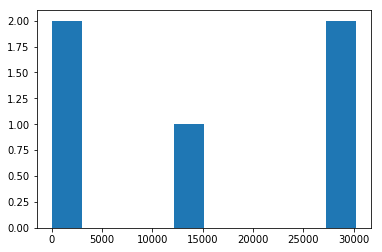

In [43]:
# Replace 'linear_model' with your model
coefs = (linear_model.coef_.tolist())
plt.hist(coefs)
plt.show()

We only give a very high level overview of ridge and lasso regression. If you have more questions, please feel free to reach out to us during office hours! The math is actually incredibly deep and very interesting. There are also these wikipedia links below. 

https://en.wikipedia.org/wiki/Tikhonov_regularization
https://en.wikipedia.org/wiki/Lasso_(statistics)

<a id='iii'></a>
# 3. Principal Component Analysis

You know how you've been taking Math 54 and Math 110 and EE16A and you just can't figure out for the life of you why all of this is useful? As you begin to go through more advanced statistical modeling in your Statistics classes, you will notice that **linear algebra is everything**. If it's not probability, it probably comes from linear algebra. 

This isn't necessarily always obvious from the early linear algebra classes at Cal. So, this week, we're going to teach you a very useful technique called **Principal Component Analysis** (*PCA*) that uses linear algebra concepts to make a new basis for your feature set. In a dataset of $k$ features, each feature or column can be considered an $n$-dimensional vector. The linear combination of these vectors forms out prediction for $y$, $\hat{y}$, that estimates the true relationship between the feature vectors and $y$. But sometimes, the original feature vectors are not well-suited for predicting $y$ in the first place - they may suffer from **multicolinearity** and it can be unclear which subset of these vectors is strikes the right balance in the bias-variance tradeoff for optimal predictive accuracy.

PCA is a pre-processing step that transforms your basis of $k$ feature vectors into a basis of $k$ **principal components** (*read: important vectors*) that span the same vector space as our original features. This new basis of principal components retains all the information from your original basis, but has splendid properties for linear modeling - (1) it removes all correlations between variables, and even (2) sorts them in order of importance in explaining $y$ (in this case `SalesPrice`). Then, you can just take the first $k' = 2, 3, 4...$ features in this new basis, and you should be able to get a very strong model for your response variable, that only has a few columns but retains most of the information.

> Conceptually, in what ways does PCA reduce overfitting (variance) of your model? (*Hint: there are two. One pertains to the number of features, whereas the other pertains to highly correlated features.*)

In short, PCA is a quick-and-easy way to pre-process your dataset automatically to decrease the variance component of its error. As long as your response variable (i.e. `SalesPrice`) is nearly linear in terms of the first few **principal components**, you can greatly reduce the error in your model and even improve computational time, as you're training on a few (improved) features. After conducting PCA, you can train a standard linear model on this new dataset of just a few columns, and generally get good results.

This is best illustrated with practice, so let's actually use PCA to pre-process your data and conduct PCA regression!

With your team, read through the following article on [concepts in PCA](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c). You do not have to understand all the linear algebra and math on eigenvectors in this article, but you should be able to answer the following questions:   
> 1. What is dimensionality reduction? Why is it important for modeling?  
> 2. What is the difference between feature elimination (used in `kaggle1`) and feature extraction (what you're learning about in this module)? What are the pros/cons of each?  
> 3. Conceptually, why does PCA make our model less interpretable? Why is this important?   
> 4. Name a couple of methods that would help us choose how many principal components to retain in the new dataset. What is the "find-the-elbow" method for scree plots?

With your team, continue your background reading by reading the following article on [implementing and practical usage of PCA in Python using sklearn](https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/). You do not have to understand the visualization code, but you should be able to answer the following questions with your team:   
> 1. What is standardizing/normalization? Why is it an important pre-processing step for PCA?
> 2. What is the relationship between the order of the principal components and their importance in modeling $y$?  
> 3. Read over and try to understand the code in the implementation section, "For Python Users". (Optionally, if you like R, feel free to read over the R section as well!). You will be using `sklearn` to implement PCA for your own housing dataset.

Now armed with your PCA dataset, let's train a linear model and compare it to our naive first attempt in `kaggle1`.

> Use `sklearn`'s [PCA function](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to process your dataset into a new dataset of principal components. Save this as `pca_full.csv`.   

> Use the visualization methods in the [second article above](https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/) to make a scree plot of the principal components in `pca_full`. Use the "find-the-elbow" method from the [first article](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) to find an optimal number of principal components. Strip down your `pca_full` dataset to just these first few columns, and save it as `pca_reduced.csv`.  

> Train a linear model similar to the one you used in `kaggle1` on `pca_reduced`. How does this PCA regression model perform in comparison to your naive linear regression model? 

<a id='conclusion'></a>
# Conclusion

This ends the second of our four collaborative sessions on the Kaggle Housing Prices competition. We are so hyped for the SUSA Datathon this weekend, and hope to see you all there! As always, please email [Arun Ramamurthy](mailto:contact@arun.run), [Patrick Chao](mailto:prc@berkeley.edu), or [Noah Gundotra](mailto:noah.gundotra@berkeley.edu) or with any questions or concerns whatsoever. Happy machine learning!

## Sneakpeek at SUSA Kaggle Competition III

After the datathon, we will teach you some new models (e.g. decision trees, ensemble learning, and more) and give you practice reading **kernels** from Kaggle. This will help give you practice with new models for the final week, on using a deep learning model to improve your team's model performance even further!

<a id='reading'></a>
# Additional Reading
* For more information on the Kaggle API, a command-line program used to download and manage Kaggle datasets, visit the [Kaggle API Github page](https://github.com/Kaggle/kaggle-api)  
* For an interactive guide to learning R and Python, visit [DataCamp](https://www.datacamp.com/) a paid tutorial website for learning data computing.
